<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/Lezione_59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TECHNICAL ANALYSIS con TA:

In [25]:
#Installare le librerie necessarie
!pip install yfinance
!pip install ta

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf


In [27]:
#IMPORTANTE: Questo è il codice per creare un grafico BLACK della misura ottimale
from matplotlib import cycler
colors= cycler('color',
               ['#669FEE','#66EE91','#9988DD',
                '#EECC55','#88BB44','#FFBBBB'])
plt.rc('figure',facecolor='#313233')
plt.rc('axes',facecolor='#313233',edgecolor='none',
       axisbelow=True,grid=True,prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid',color='474A4A',linestyle='solid')
plt.rc('xtick',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('legend',facecolor='#313233',edgecolor='#313233')
plt.rc('text',color='C9C9C9')
plt.rcParams['figure.figsize']=[20,8]

In [28]:
plt.style.use="seaborn"

In [29]:
#importo un nuovo set di dati direttamente dal mio pc e li importo per poi
#indicizzarli e poterli utilizzare
df=pd.read_csv("/content/AMZN_H1_202001021600_202501312200.csv",delimiter="\t").dropna()
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0


In [30]:
df.columns=["Date","Time","Open","High","Low","Close","TickVol","Volume","Spread"]
df.head()

,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0


In [31]:
#ora invece vado a ricreare le medie mobili con l'aggiunta del metodo SHIFT
df["SMA 15"]= df["Close"].rolling(15).mean().shift(1)
df["SMA 60"]= df["Close"].rolling(60).mean().shift(1)
df

,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread,SMA 15,SMA 60
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0,NaN,NaN
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0,NaN,NaN
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0,NaN,NaN
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0,NaN,NaN
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8889,2025.01.31,18:00:00,239.29,239.80,238.47,239.57,5717,0,3,236.668667,234.500500
8890,2025.01.31,19:00:00,239.58,239.85,238.49,239.42,5605,0,3,236.749333,234.722833
8891,2025.01.31,20:00:00,239.43,240.28,238.14,238.64,6250,0,3,236.876000,234.947167
8892,2025.01.31,21:00:00,238.64,238.93,236.89,238.11,6272,0,3,236.946667,235.120833


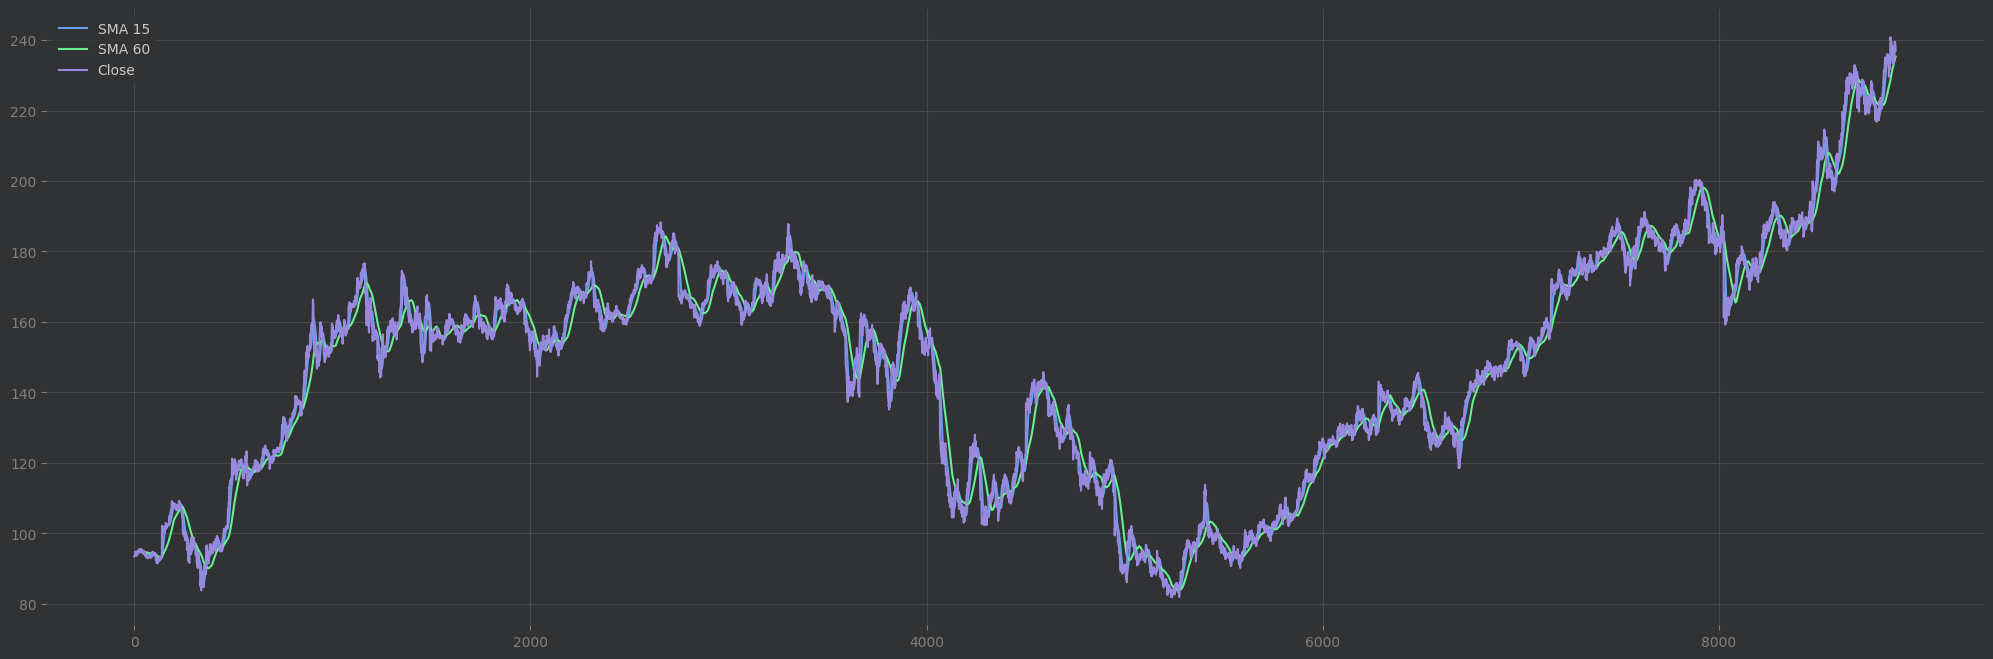

In [32]:
#Adessso vado a mettere su display la strategia per visualizzarne le performance
ax = df[["SMA 15", "SMA 60", "Close"]].plot(figsize=(25,8))

In [33]:
import ta
RSI= ta.momentum.RSIIndicator(df["Close"],window=14, fillna= False)
#qui ho utilizzato il modulo MOMENTUM e la classe RSIINDICATOR
#NOTA: Ho compreso che un costrutto come questo qui soprasi suddivide come segue:
#"ta"= libreria
#"momentum"= modulo
#"RSIINDICATOR"= classe

<Axes: >

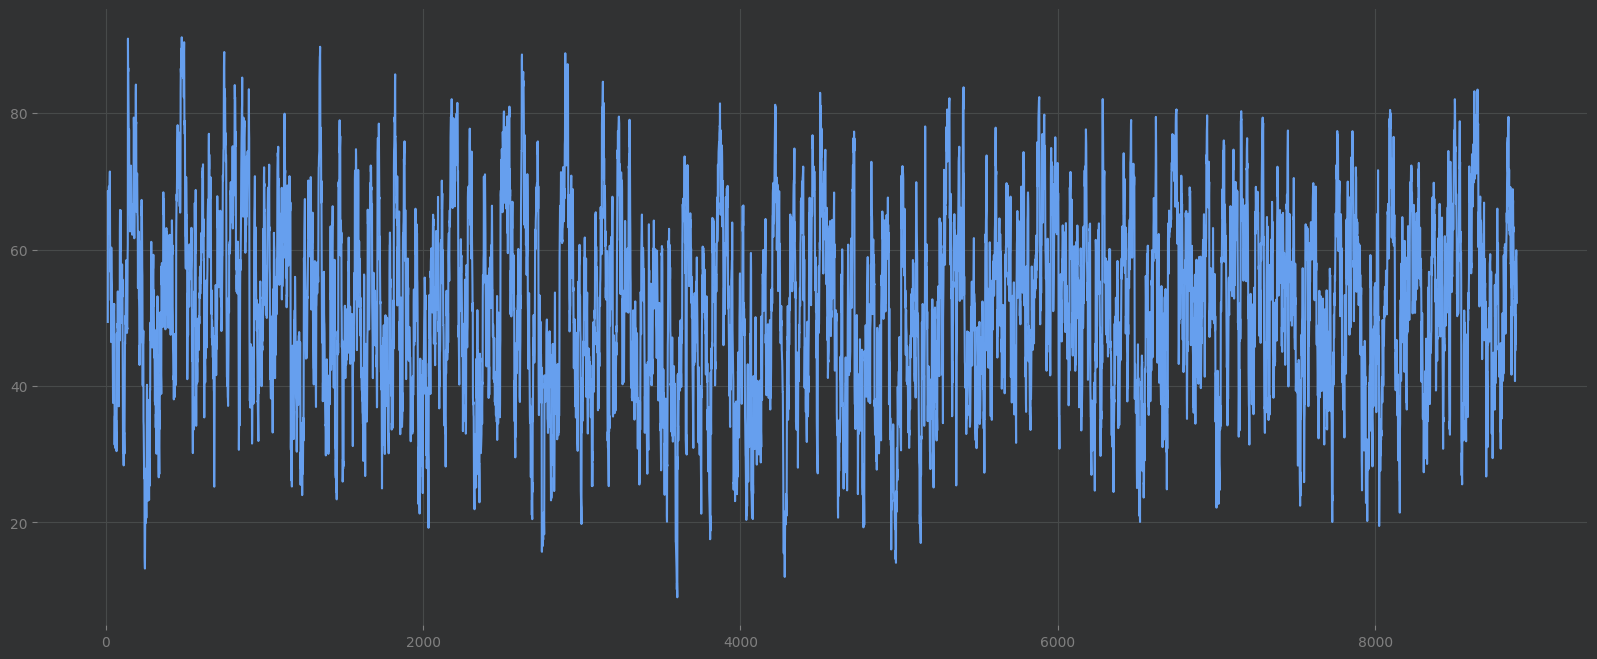

In [38]:
#Adesso creiamo l'RSI con il modulo dedicato
#NOTA: Credo che talib sarà una libreria interessante per fare pratica con i sistemi di trading
#perchè mi sembra molto versatile ed intuitiva
df["rsi"]=RSI.rsi()
df["rsi"].plot(figsize=(20,8))

In [ ]:
#NOTA: Non riesco a comprendere che output sia venuto fuori! DA RIVEDERE!!!

IMPORTANTISSIMO:La parte più importante di una strategia di trading sono sempre I DATI. Molti studenti pensano che creare modelli sempre più complessi sia la soluzione mentre in realtà la cosa più importante è avre buoni dati e saperli elaborare raffinatamente